In [4]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("raw_cpi.csv")

In [52]:
df

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,CHN,China (People's Republic of),CPALTT01,CPI: 01-12 - All items,IXOB,Index,A,Annual,2015,2015,IDX,Index,0,Units,2015_100,2015=100,100.00000,NaN,NaN
1,CHN,China (People's Republic of),CPALTT01,CPI: 01-12 - All items,IXOB,Index,A,Annual,2016,2016,IDX,Index,0,Units,2015_100,2015=100,102.00000,NaN,NaN
2,CHN,China (People's Republic of),CPALTT01,CPI: 01-12 - All items,IXOB,Index,A,Annual,2017,2017,IDX,Index,0,Units,2015_100,2015=100,103.62500,NaN,NaN
3,CHN,China (People's Republic of),CPALTT01,CPI: 01-12 - All items,IXOB,Index,A,Annual,2018,2018,IDX,Index,0,Units,2015_100,2015=100,105.77500,NaN,NaN
4,CHN,China (People's Republic of),CPALTT01,CPI: 01-12 - All items,IXOB,Index,A,Annual,2019,2019,IDX,Index,0,Units,2015_100,2015=100,108.84170,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,JPN,Japan,CP180420,CPI (COICOP 18): 04.2 - CPI Imputed rentals fo...,IXOB,Index,A,Annual,2018,2018,IDX,Index,0,Units,2015_100,2015=100,99.22243,NaN,NaN
7436,JPN,Japan,CP180420,CPI (COICOP 18): 04.2 - CPI Imputed rentals fo...,IXOB,Index,A,Annual,2019,2019,IDX,Index,0,Units,2015_100,2015=100,99.16453,NaN,NaN
7437,JPN,Japan,CP180420,CPI (COICOP 18): 04.2 - CPI Imputed rentals fo...,IXOB,Index,A,Annual,2020,2020,IDX,Index,0,Units,2015_100,2015=100,99.26379,NaN,NaN
7438,JPN,Japan,CP180420,CPI (COICOP 18): 04.2 - CPI Imputed rentals fo...,IXOB,Index,A,Annual,2021,2021,IDX,Index,0,Units,2015_100,2015=100,99.37133,NaN,NaN


In [32]:
df_oup["Country"].unique()

array(['China', 'Netherlands', 'Greece', 'United Kingdom', 'Belgium',
       'Sweden', 'India', 'Ireland', 'Korea', 'Norway', 'Costa Rica',
       'Brazil', 'Slovak Republic', 'Mexico', 'Czech Republic', 'Russia',
       'Israel', 'France', 'Chile', 'Australia', 'Lithuania',
       'Switzerland', 'New Zealand', 'Colombia', 'Austria',
       'Saudi Arabia', 'Hungary', 'Slovenia', 'United States', 'Finland',
       'South Africa', 'Indonesia', 'Luxembourg', 'Latvia', 'Iceland',
       'Japan', 'Germany', 'Denmark', 'Poland', 'Türkiye', 'Spain',
       'Italy', 'Estonia', 'Canada', 'Portugal'], dtype=object)

In [35]:
df_oup_without_turkey = df_oup.loc[df_oup["Country"] != "Türkiye"]

In [36]:
df_oup_without_turkey.to_csv("cpi_without_turkey.csv", index=False)

In [15]:
df_oup = df[(df["Frequency"] == "Annual") & (df["Measure"] == "Index") & (df["Subject"] == "CPI: 01-12 - All items")][["Country", "Time", "Value"]]

,Country,Time,Value
0,China (People's Republic of),2015,100.0000
1,China (People's Republic of),2016,102.0000
2,China (People's Republic of),2017,103.6250
3,China (People's Republic of),2018,105.7750
4,China (People's Republic of),2019,108.8417
5,China (People's Republic of),2020,111.4750
6,China (People's Republic of),2021,112.5686
7,China (People's Republic of),2022,114.7902


In [22]:
df_oup.loc[df_oup["Country"] == "China (People's Republic of)", "Country"] = ["China" for _ in range(8)]

In [25]:
df_oup.to_csv("cpi.csv", index=False)

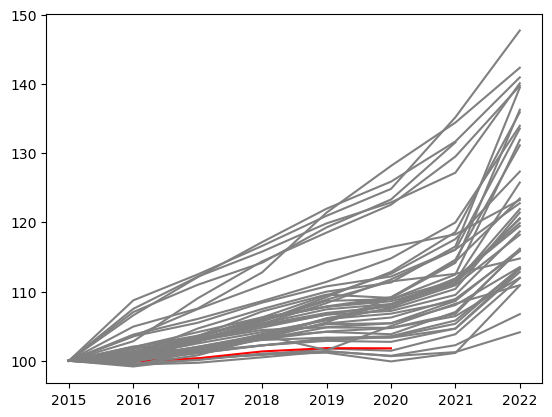

In [38]:
countries = df_oup_without_turkey.groupby("Country")
for country_name, country_df in countries:
    plt.plot(country_df["Time"], country_df["Value"], label=country_name, color="red" if country_name == "Japan" else "grey")
# plt.legend()

In [39]:
df2 = pd.read_csv("cpi_japan_and_costarica.csv")

In [65]:
df2[(df2["Frequency"] == "Annual")  & (df2["Country"] == "Japan") &(df2["Unit"] == "Index") & (df2["Subject"] == "CPI (COICOP 18): 01-12 - All items")&(df["Measure"] == "Index")]

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
7240,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2015,2015,IDX,Index,0,Units,2015_100,2015=100,100.00000,NaN,NaN
7241,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2016,2016,IDX,Index,0,Units,2015_100,2015=100,99.87274,NaN,NaN
7242,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2017,2017,IDX,Index,0,Units,2015_100,2015=100,100.35630,NaN,NaN
7243,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2018,2018,IDX,Index,0,Units,2015_100,2015=100,101.34890,NaN,NaN
7244,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2019,2019,IDX,Index,0,Units,2015_100,2015=100,101.82400,NaN,NaN
7245,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2020,2020,IDX,Index,0,Units,2015_100,2015=100,101.79860,NaN,NaN
7246,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2021,2021,IDX,Index,0,Units,2015_100,2015=100,101.56100,NaN,NaN
7247,JPN,Japan,CP18ALTT,CPI (COICOP 18): 01-12 - All items,IXOB,Index,A,Annual,2022,2022,IDX,Index,0,Units,2015_100,2015=100,104.09770,NaN,NaN


In [66]:
df2_filtered = df2[(df2["Frequency"] == "Annual")  & (df2["Country"] == "Japan") &(df2["Unit"] == "Index") & (df2["Subject"] == "CPI (COICOP 18): 01-12 - All items")&(df["Measure"] == "Index")]

In [67]:
df2_filtered[["Country", "Time", "Value"]]

,Country,Time,Value
7240,Japan,2015,100.00000
7241,Japan,2016,99.87274
7242,Japan,2017,100.35630
7243,Japan,2018,101.34890
7244,Japan,2019,101.82400
7245,Japan,2020,101.79860
7246,Japan,2021,101.56100
7247,Japan,2022,104.09770


In [72]:
len(df_oup)

356

In [75]:
df_final = pd.concat([df_oup_without_turkey[df_oup_without_turkey["Country"] != "Japan"], df2_filtered[["Country", "Time", "Value"]]], ignore_index=True)

In [77]:
df_final.to_csv("cpi_with_japan.csv", index=False)